<a href="https://colab.research.google.com/github/skumbham/IST_719_NYDMV_Onondaga_Analysis/blob/main/NyDmv_Onondaga_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Required Packages
required_packages <- c("dplyr", "tidyr", "viridis", "ggplot2", "ggalluvial", "lubridate")

# Check and install missing packages
installed_packages <- .packages(all.available = TRUE)
for (package in required_packages) {
  if (!package %in% installed_packages) {
    install.packages(package)
  }
}

# Load the necessary libraries
lapply(required_packages, library, character.only = TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lazyeval’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "tidyr"     "dplyr"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "viridis"     "viridisLite" "tidyr"       "dplyr"       "stats"      
 [6] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[11] "base"       

[[4]]
 [1] "ggplot2"     "viridis"     "viridisLite" "tidyr"       "dplyr"      
 [6] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[11] "methods"     "base"       

[[5]]
 [1] "ggalluvial"  "ggplot2"     "viridis"     "viridisLite" "tidyr"      
 [6] "dplyr"       "stats"       "graphics"    "grDevices"   "utils"      
[11] "datasets"    "methods"     "base"       

[[6]]
 [1] "lubridate"   "ggalluvial"  "ggplot2"     "viridis"     "viridisLite"
 [6] "tidyr"       "dplyr"       "stats"       "graphics"    "grDevices"  
[11] "utils"       "datasets"    "methods"     "base"

In [12]:
# Load DMV Data
DMV_Data <- read.csv("/content/DMV_Data.csv")

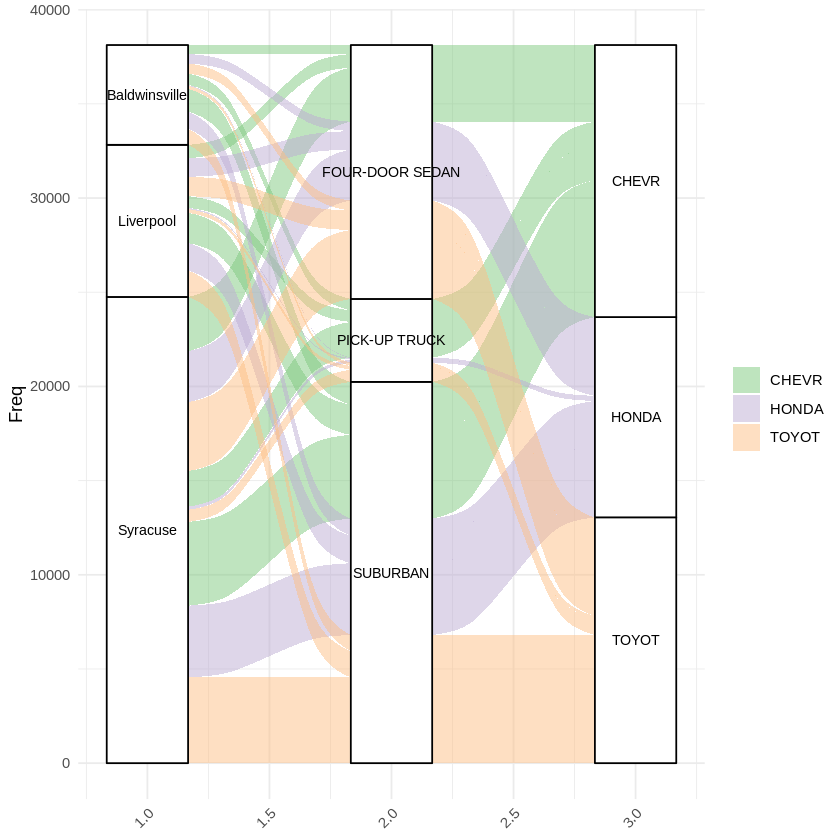

In [2]:
# Main Plot: Determine the top 3 cities, body types, and makes
final_dataset <- DMV_Data

# Determine the top 3 cities with the most registrations
top_cities <- final_dataset %>%
  count(City, sort = TRUE) %>%
  top_n(3, n) %>%
  pull(City)

# Determine the top 3 body types
top_body_types <- final_dataset %>%
  count(Body.Type, sort = TRUE) %>%
  top_n(3, n) %>%
  pull(Body.Type)

# Determine the top 3 makes
top_makes <- final_dataset %>%
  count(Make.Code, sort = TRUE) %>%
  top_n(3, n) %>%
  pull(Make.Code)

# Filter the dataset for the top criteria
filtered_data <- final_dataset %>%
  filter(City %in% top_cities, Body.Type %in% top_body_types, Make.Code %in% top_makes)

# Prepare data for alluvial plot
alluvial_data <- as.data.frame(table(filtered_data$City, filtered_data$Body.Type, filtered_data$Make.Code))
names(alluvial_data) <- c("City", "Body.Type", "Make.Code", "Freq")

# Create the alluvial (Sankey) plot
ggplot(data = alluvial_data, aes(axis1 = City, axis2 = Body.Type, axis3 = Make.Code, y = Freq)) +
  geom_alluvium(aes(fill = Make.Code)) +
  geom_stratum() +
  geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
  scale_fill_brewer(type = "qual") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_blank())

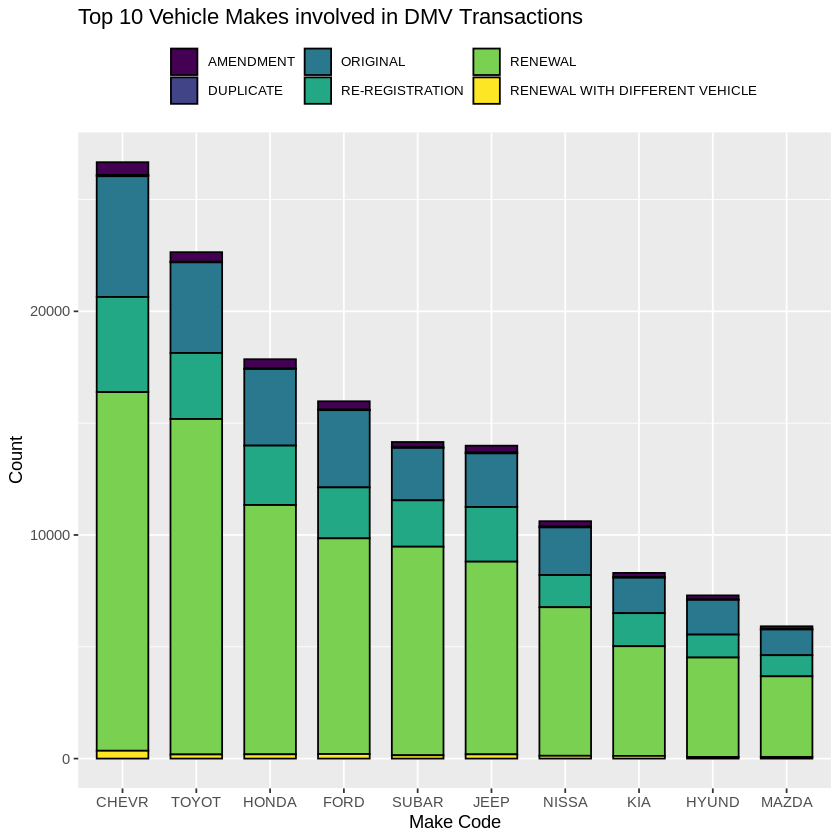

In [3]:
# Stacked Bar Plot for Top 10 Vehicle Makes
top_makes <- names(sort(table(DMV_Data$Make.Code), decreasing = TRUE))[1:10]
data_top_makes <- DMV_Data[DMV_Data$Make.Code %in% top_makes,]
data_top_makes$Make.Code <- factor(data_top_makes$Make.Code, levels = top_makes)
ggplot(data_top_makes, aes(x = Make.Code, fill = Transaction)) +
  geom_bar(stat = "count", color = "black", width = 0.7) +
  scale_fill_viridis_d() +
  theme_grey() +
  theme(legend.position = "top",
        legend.direction = "horizontal",
        legend.box = "right",
        legend.title = element_blank(),
        legend.text = element_text(size = 8)) +
  labs(title = "Top 10 Vehicle Makes involved in DMV Transactions",
       x = "Make Code",
       y = "Count")

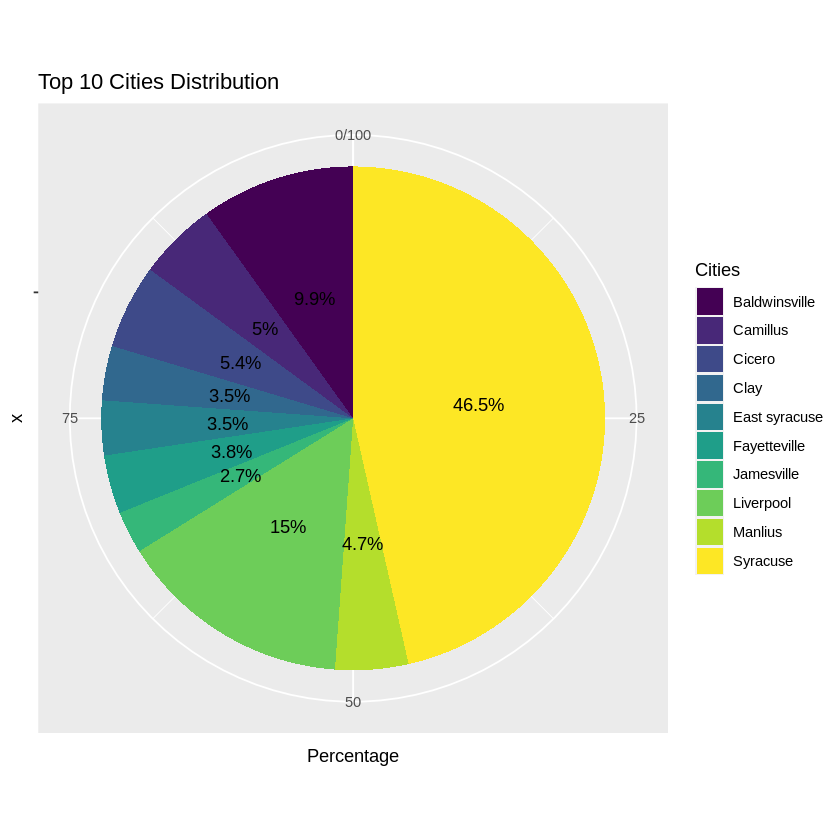

In [4]:
# Pie Chart of Top 10 Cities by Registration
top_cities <- names(sort(table(DMV_Data$City), decreasing = TRUE))[1:10]
data_top_cities <- subset(DMV_Data, City %in% top_cities)
city_counts <- as.data.frame(table(data_top_cities$City))
city_counts <- city_counts %>%
  mutate(Percentage = Freq / sum(Freq) * 100)
ggplot(city_counts, aes(x = "", y = Percentage, fill = Var1)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  scale_fill_viridis_d(name = "Cities") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5)) +
  theme_grey() +
  labs(title = "Top 10 Cities Distribution")

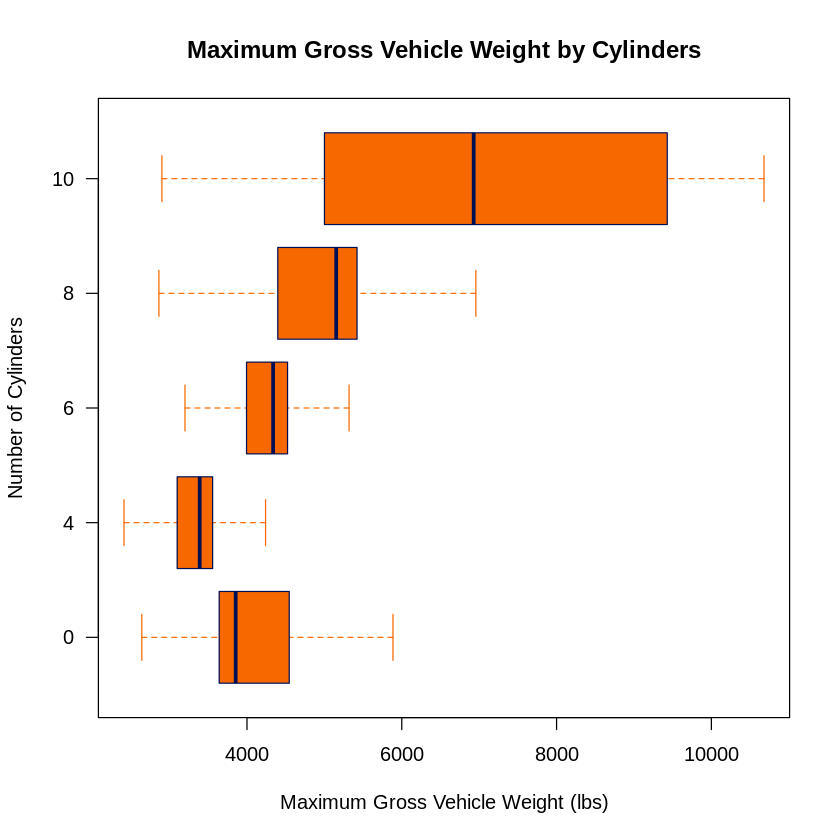

In [5]:
# Box Plot: Cylinders vs Weight
filtered_data <- DMV_Data[
  DMV_Data$Make.Code %in% c("CHEVR", "TOYOT", "FORD", "HONDA", "SUBAR", "JEEP", "NISSA", "KIA", "HYUND", "DODGE") &
  DMV_Data$Cylinders %in% c(0, 4, 6, 8, 10, 12) &
  DMV_Data$Body.Type %in% c("CONVERTIBLE", "PICK-UP TRUCK", "TWO-DOOR SEDAN", "FOUR-DOOR SEDAN", "SUBURBAN"),]
filtered_data$Maximum.Gross.Vehicle.Weight <- as.numeric(filtered_data$Maximum.Gross.Vehicle.Weight)
boxplot(Maximum.Gross.Vehicle.Weight ~ Cylinders,
        data = filtered_data,
        horizontal = TRUE,
        main = "Maximum Gross Vehicle Weight by Cylinders",
        xlab = "Maximum Gross Vehicle Weight (lbs)",
        ylab = "Number of Cylinders",
        col = "#F76900",
        border = "#000E54",
        outline = FALSE,
        medcol = "#000E54",
        whiskcol = "#F76900",
        staplecol = "#F76900",
        notch = FALSE,
        las = 1)

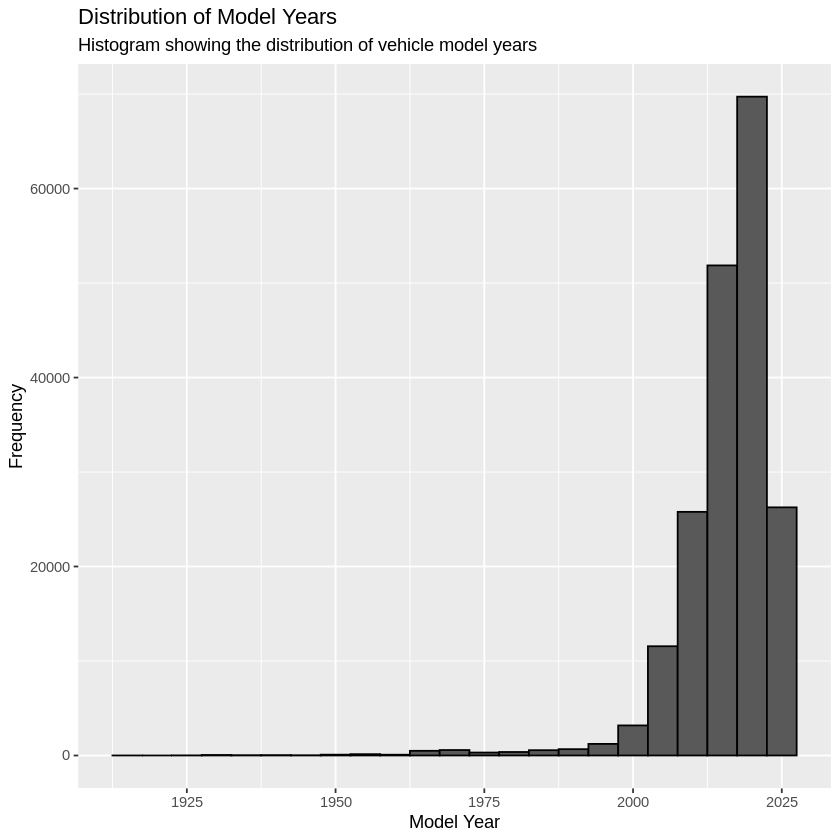

In [6]:
# Histogram for Model Year
ggplot(DMV_Data, aes(x = Model.Year)) +
  geom_histogram(binwidth = 5, color = "black") +
  scale_fill_viridis_d() +
  theme_grey() +
  theme(legend.position = "none") +
  labs(title = "Distribution of Model Years",
       subtitle = "Histogram showing the distribution of vehicle model years",
       x = "Model Year",
       y = "Frequency")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


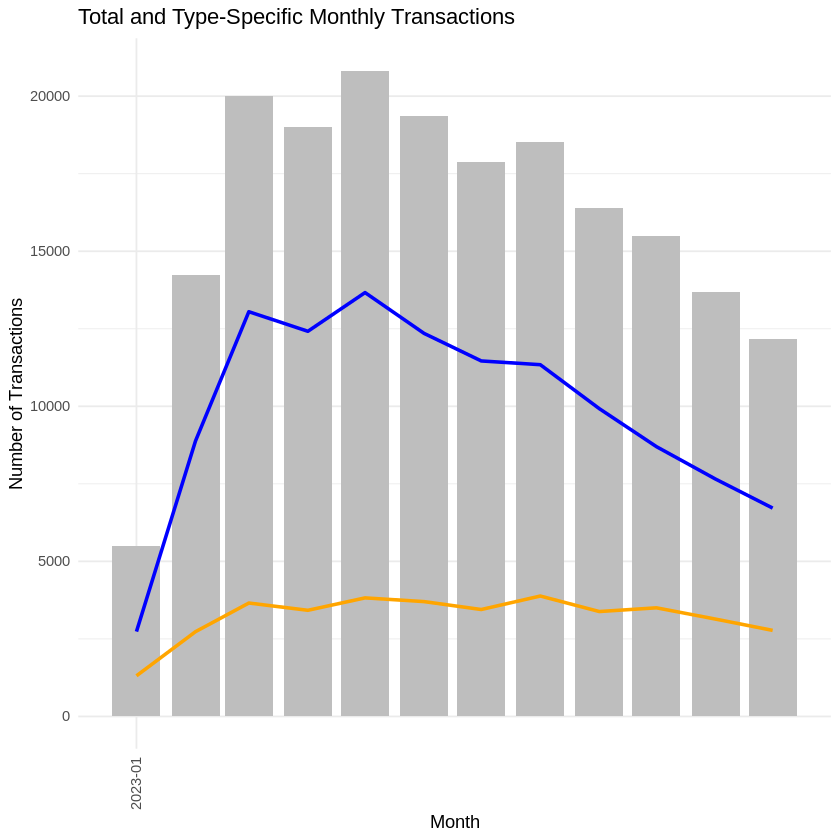

In [18]:
# Monthly DMV Transactions

# Load data
final_dataset <- DMV_Data

# Convert Effective.Date from the observed format to Date object
# Assuming the format might be something different, e.g., MM/DD/YYYY
# Adjust the format string as per the actual format you observe from the print statement
final_dataset$Effective.Date <- as.Date(final_dataset$Effective.Date, format = "%m/%d/%Y")

# If format is correct and conversion is successful, continue processing
if (any(!is.na(final_dataset$Effective.Date))) {
  # Extract year and month for grouping using lubridate's floor_date function
  final_dataset$YearMonth <- floor_date(final_dataset$Effective.Date, "month")

  # Prepare a summary of transactions by month
  transaction_summary <- final_dataset %>%
    group_by(YearMonth) %>%
    summarise(Total = n(),
              Original = sum(Transaction == 'ORIGINAL'),
              Renewal = sum(Transaction == 'RENEWAL'))

  # Plot if data is sufficient
  if (nrow(transaction_summary) > 0) {
    ggplot(transaction_summary, aes(x = YearMonth)) +
      geom_col(aes(y = Total), fill = "grey") +
      geom_line(aes(y = Original, group = 1), colour = "orange", size = 1) +
      geom_line(aes(y = Renewal, group = 1), colour = "blue", size = 1) +
      labs(title = "Total and Type-Specific Monthly Transactions",
           x = "Month", y = "Number of Transactions") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
      scale_x_date(date_breaks = "1 year", date_labels = "%Y-%m") # Adjusted to show yearly breaks
  } else {
    print("No data available for plotting after processing dates.")
  }
} else {
  print("Effective date conversion failed, please check date formats in the dataset.")
}
